In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from io import StringIO
from IPython.display import SVG
import pydot #

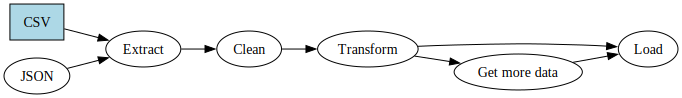

In [36]:
graph = pydot.Dot(graph_type='digraph', rankdir='LR')

node_csv = pydot.Node('CSV', shape='box', style='filled', fillcolor='lightblue')
graph.add_node(node_csv)

node_json = pydot.Node('JSON')

node_extract = pydot.Node('Extract', shape='box')

node_clean = pydot.Node('Clean', shape='box')
node_transform = pydot.Node('Transform', shape='box')

node_load = pydot.Node('Load', shape='box', style='filled', fillcolor='lightgreen')

graph.add_edge(pydot.Edge(node_csv, node_extract))
graph.add_edge(pydot.Edge(node_json, node_extract))
graph.add_edge(pydot.Edge(node_extract, node_clean))
graph.add_edge(pydot.Edge(node_clean, node_transform))
graph.add_edge(pydot.Edge(node_transform, node_load))

node_enrich = pydot.Node('Get more data', shape='box')
graph.add_edge(pydot.Edge(node_transform, node_enrich))
graph.add_edge(pydot.Edge(node_enrich, node_load))

# graph.write_png('etl.png')
svg_str = graph.create_svg()

SVG(data=svg_str)

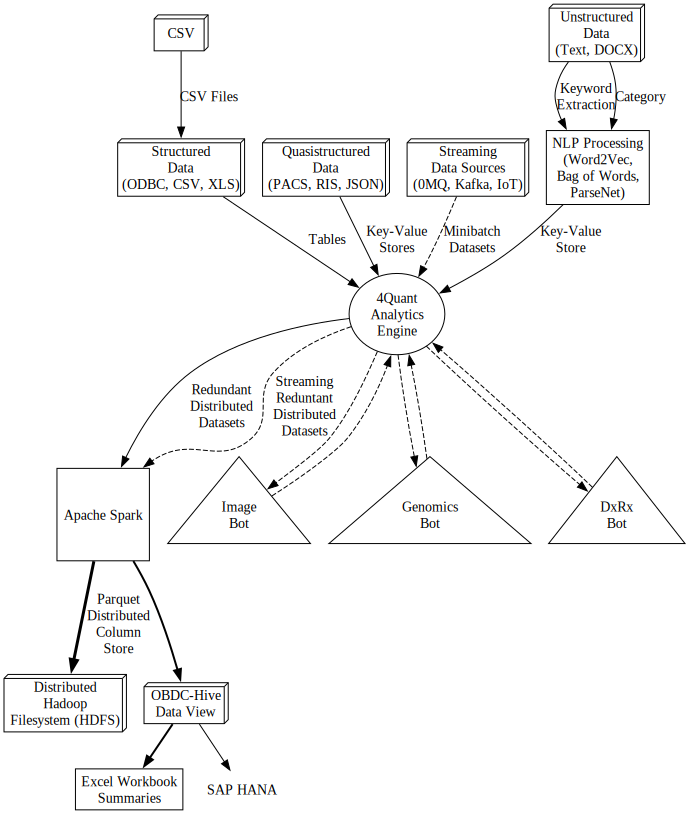

In [29]:
dot_graph = pydot.Dot(graph_type='digraph')

node_csv = pydot.Node('CSV')
node_csv.set_shape('box3d')
dot_graph.add_node(node_csv)

sd_node = pydot.Node('Structured\nData\n(ODBC, CSV, XLS)')
sd_node.set_shape('box3d')
dot_graph.add_node(sd_node)

qsd_node = pydot.Node('Quasistructured\nData\n(PACS, RIS, JSON)')
qsd_node.set_shape('box3d')
dot_graph.add_node(qsd_node)

sds_node = pydot.Node('Streaming\nData Sources\n(0MQ, Kafka, IoT)')
sds_node.set_shape('box3d')
dot_graph.add_node(sds_node)

usd_node = pydot.Node('Unstructured\nData\n(Text, DOCX)')
usd_node.set_shape('box3d')
dot_graph.add_node(usd_node)

nlp_node = pydot.Node('NLP Processing\n(Word2Vec,\nBag of Words,\nParseNet)')
nlp_node.set_shape('box')
dot_graph.add_node(nlp_node)

riq_node = pydot.Node('4Quant\nAnalytics\nEngine')
#riq_node.set_shape('box3d')
dot_graph.add_node(riq_node)

iedge = pydot.Edge(node_csv,sd_node)
iedge.set_label('CSV Files')
dot_graph.add_edge(iedge)

iedge = pydot.Edge(sd_node,riq_node)
iedge.set_label('Tables')
dot_graph.add_edge(iedge)

iedge = pydot.Edge(qsd_node,riq_node)
iedge.set_label('Key-Value\nStores')
dot_graph.add_edge(iedge)

iedge = pydot.Edge(usd_node,nlp_node)
iedge.set_label('Keyword\nExtraction')
dot_graph.add_edge(iedge)

iedge = pydot.Edge(usd_node,nlp_node)
iedge.set_label('Category')
dot_graph.add_edge(iedge)

iedge = pydot.Edge(nlp_node,riq_node)
iedge.set_label('Key-Value\nStore')
dot_graph.add_edge(iedge)

iedge = pydot.Edge(sds_node,riq_node)
iedge.set_label('Minibatch\nDatasets')
iedge.set_style('dashed')
dot_graph.add_edge(iedge)


asp_node = pydot.Node('Apache Spark')
asp_node.set_shape('square')
dot_graph.add_node(asp_node)

hadoop_node = pydot.Node('Distributed\nHadoop\nFilesystem (HDFS)')
hadoop_node.set_shape('box3d')
dot_graph.add_node(hadoop_node)

iedge = pydot.Edge(riq_node,asp_node)
iedge.set_label('Redundant\nDistributed\nDatasets')
dot_graph.add_edge(iedge)

iedge = pydot.Edge(riq_node,asp_node)
iedge.set_label('Streaming\nReduntant\nDistributed\nDatasets')
iedge.set_style('dashed')
dot_graph.add_edge(iedge)

iedge = pydot.Edge(asp_node,hadoop_node)
iedge.set_label('Parquet\nDistributed\nColumn\nStore')
iedge.set_penwidth(3)
dot_graph.add_edge(iedge)

odbc_node = pydot.Node('OBDC-Hive\nData View')
odbc_node.set_shape('box3d')
dot_graph.add_node(odbc_node)

xls_node = pydot.Node('Excel Workbook\nSummaries')
xls_node.set_shape('box')
dot_graph.add_node(xls_node)

iedge = pydot.Edge(asp_node,odbc_node)
iedge.set_penwidth(2)
dot_graph.add_edge(iedge)

iedge = pydot.Edge(odbc_node,xls_node)
iedge.set_penwidth(2)
dot_graph.add_edge(iedge)

sap_node = pydot.Node('SAP HANA')
sap_node.set_shape('none')
dot_graph.add_node(sap_node)

iedge = pydot.Edge(odbc_node,sap_node)
iedge.set_penwidth(1)
dot_graph.add_edge(iedge)


ibot_node = pydot.Node('Image\nBot')
ibot_node.set_shape('triangle')
dot_graph.add_node(ibot_node)


iedge = pydot.Edge(riq_node,ibot_node)
iedge.set_penwidth(1)
iedge.set_style('dashed')
dot_graph.add_edge(iedge)

iedge = pydot.Edge(ibot_node, riq_node)
iedge.set_penwidth(1)
iedge.set_style('dashed')
dot_graph.add_edge(iedge)

ibot_node = pydot.Node('Genomics\nBot')
ibot_node.set_shape('triangle')
dot_graph.add_node(ibot_node)


iedge = pydot.Edge(riq_node,ibot_node)
iedge.set_penwidth(1)
iedge.set_style('dashed')
dot_graph.add_edge(iedge)

iedge = pydot.Edge(ibot_node, riq_node)
iedge.set_penwidth(1)
iedge.set_style('dashed')
dot_graph.add_edge(iedge)

ibot_node = pydot.Node('DxRx\nBot')
ibot_node.set_shape('triangle')
dot_graph.add_node(ibot_node)


iedge = pydot.Edge(riq_node,ibot_node)
iedge.set_penwidth(1)
iedge.set_style('dashed')
dot_graph.add_edge(iedge)

iedge = pydot.Edge(ibot_node, riq_node)
iedge.set_penwidth(1)
iedge.set_style('dashed')
dot_graph.add_edge(iedge)


dot_graph.write_svg('big_data.svg')
dot_graph.write_ps2('big_data.ps2')
SVG('big_data.svg')

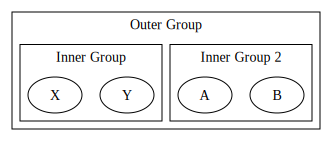

In [44]:
graph = pydot.Dot(graph_type='graph',  rankdir='TB')

outer = pydot.Cluster("cluster_outer", label="Outer Group")

inner = pydot.Cluster("cluster_inner", label="Inner Group",  rankdir='TB')
inner.add_node(pydot.Node("X"))
inner.add_node(pydot.Node("Y"))

inner_2 = pydot.Cluster("cluster_inner_2", label="Inner Group 2", rankdir='LR')
inner_2.add_node(pydot.Node("A"))
inner_2.add_node(pydot.Node("B"))

outer.add_subgraph(inner)
outer.add_subgraph(inner_2)

graph.add_subgraph(outer)

svg_str = graph.create_svg()

SVG(data=svg_str)